In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [4]:
batch_size = 64
learning_rate = 0.01
num_epochs = 10


In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 36172168.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1351568.67it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 8712297.43it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6968006.13it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model = Net()


In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [8]:
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Batch {batch_idx}, Loss: {loss.item():.6f}')


Epoch 1/10, Batch 0, Loss: 2.304946
Epoch 1/10, Batch 100, Loss: 1.742542
Epoch 1/10, Batch 200, Loss: 0.987824
Epoch 1/10, Batch 300, Loss: 0.558010
Epoch 1/10, Batch 400, Loss: 0.571183
Epoch 1/10, Batch 500, Loss: 0.357661
Epoch 1/10, Batch 600, Loss: 0.272797
Epoch 1/10, Batch 700, Loss: 0.368547
Epoch 1/10, Batch 800, Loss: 0.353420
Epoch 1/10, Batch 900, Loss: 0.417591
Epoch 2/10, Batch 0, Loss: 0.255693
Epoch 2/10, Batch 100, Loss: 0.285045
Epoch 2/10, Batch 200, Loss: 0.409404
Epoch 2/10, Batch 300, Loss: 0.284360
Epoch 2/10, Batch 400, Loss: 0.170862
Epoch 2/10, Batch 500, Loss: 0.267882
Epoch 2/10, Batch 600, Loss: 0.313855
Epoch 2/10, Batch 700, Loss: 0.282081
Epoch 2/10, Batch 800, Loss: 0.157371
Epoch 2/10, Batch 900, Loss: 0.296097
Epoch 3/10, Batch 0, Loss: 0.243297
Epoch 3/10, Batch 100, Loss: 0.140621
Epoch 3/10, Batch 200, Loss: 0.203415
Epoch 3/10, Batch 300, Loss: 0.346866
Epoch 3/10, Batch 400, Loss: 0.231408
Epoch 3/10, Batch 500, Loss: 0.197203
Epoch 3/10, Batch 

In [9]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Test Accuracy: 96.72%


In [10]:
torch.save(model.state_dict(), 'mnist_model.pth')


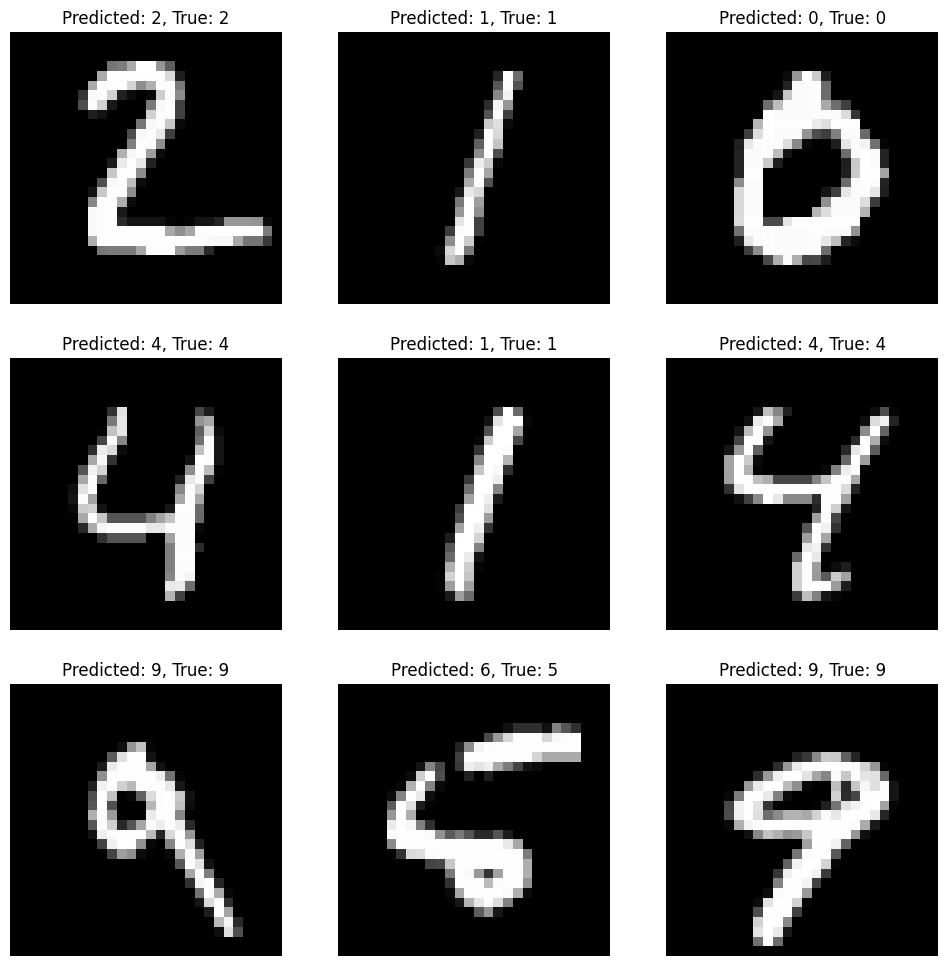

In [18]:
import matplotlib.pyplot as plt
# Visualize Predictions
def visualize_predictions(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    data_iter = iter(test_loader)
    images, labels = next(data_iter)  # Get a batch of test images and labels

    with torch.no_grad():
        output = model(images)  # Get model predictions
        _, preds = torch.max(output, 1)  # Get the index of the highest score

    # Plot images with predicted and true labels
    fig = plt.figure(figsize=(12, 12))
    for idx in range(1, 10):  # Display the first 9 images
        ax = fig.add_subplot(3, 3, idx)
        ax.imshow(images[idx].numpy().squeeze(), cmap='gray')
        ax.set_title(f'Predicted: {preds[idx].item()}, True: {labels[idx].item()}')
        ax.axis('off')
    plt.show()

# Call the function to visualize predictions
visualize_predictions(model, test_loader)